In [45]:
import pandas as d
data = d.read_excel(r"C:\Users\Rohit\Desktop\SkinSegmentation.xlsx")
data.head()

,B,G,R,SKINNONSKIN
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B              245057 non-null int64
G              245057 non-null int64
R              245057 non-null int64
SKINNONSKIN    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [11]:
data.describe()

,B,G,R,SKINNONSKIN
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


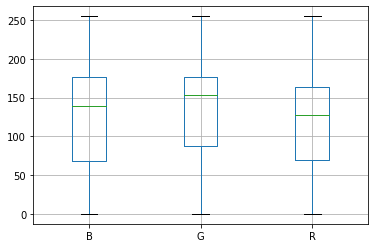

In [46]:
data.boxplot(column=['B','G','R'])

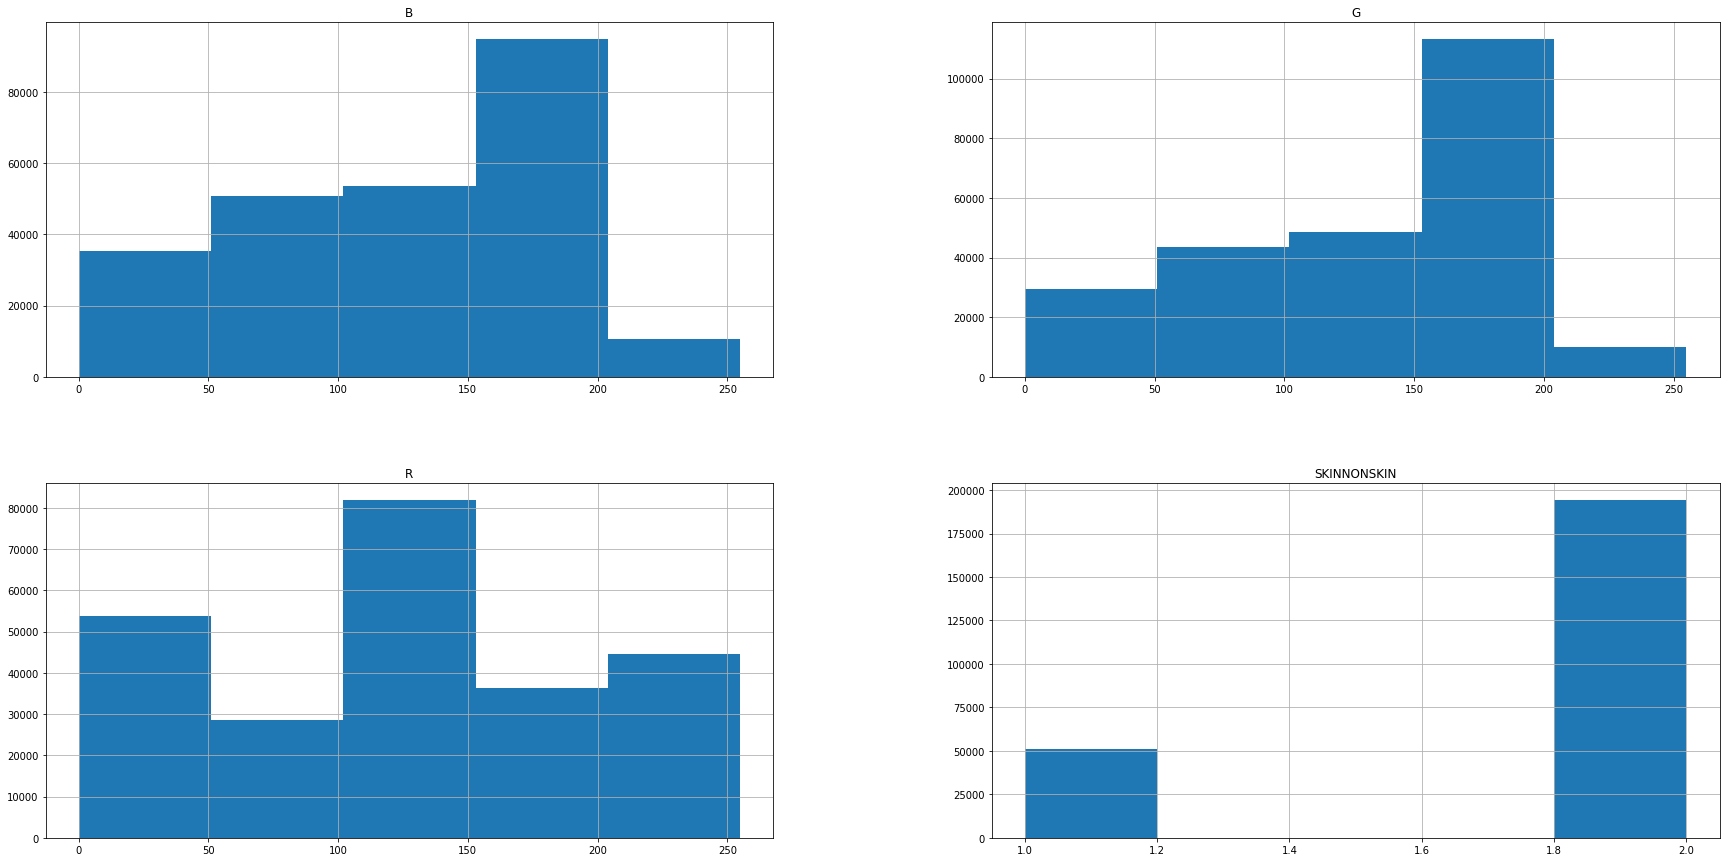

In [12]:
%matplotlib inline  
import matplotlib.pyplot as plot
data.hist(bins = 5, figsize = (30,15))
plot.show()

### Dataset is collected by randomly sampling B,G and R values from face images of various age groups (young, middle, and old), race groups (white, black, and Asian), and genders obtained from FERET database and PAL database.We can see from above bar graph and details that the total learning sample size is 245057; out of which 50859 are the skin samples and 194198 are non-skin samples. The Blue, Green and Red ranges from 0-255.

### This number of samples in this problem is high but the features are less so we can individually visualize each features. 

No handles with labels found to put in legend.


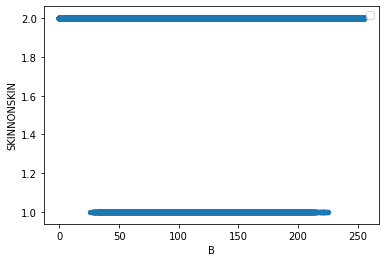

In [13]:
%matplotlib inline
import matplotlib.pyplot as plot
data.plot(kind = "scatter", x="B", y = "SKINNONSKIN")
plot.legend()

### From the above scatter plot we can infer that the skin ranges from 30 to 230 in the Blue component value of pixel. Anything below 30 and above 230 is a nonskin color.

No handles with labels found to put in legend.


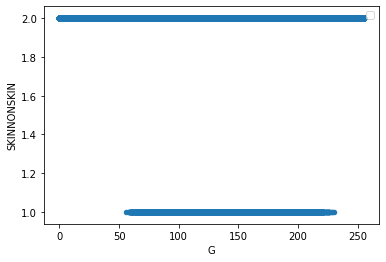

In [14]:
%matplotlib inline
import matplotlib.pyplot as plot
data.plot(kind = "scatter", x="G", y = "SKINNONSKIN")
plot.legend()

### From the above scatter plot we can infer that the Skin color ranges from 50 to 230 in the Green component value of pixel. Anything below 50 and above 230 is a nonskin color.

No handles with labels found to put in legend.


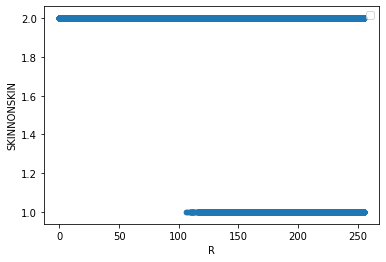

In [15]:
%matplotlib inline
import matplotlib.pyplot as plot
data.plot(kind = "scatter", x="R", y = "SKINNONSKIN")
plot.legend()

### From the above scatter plot we can clearly infer that skin color ranges from 100 to 255 in red component value of pixel. Anything below 100 is a non skin colors.

In [47]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
import scipy as sp

data = sp.genfromtxt(r"C:\Users\Rohit\Desktop\Skin_NonSkin.txt")
sp.random.shuffle(data)
data = np.array(data)

print("Last 10 rows of Data: \n" + str(data[-10:]))
print(data.shape)

Last 10 rows of Data: 
[[132. 135.  89.   2.]
 [ 96. 145. 221.   1.]
 [106. 137. 198.   1.]
 [127. 130.  84.   2.]
 [176. 175. 125.   2.]
 [167. 166. 115.   2.]
 [ 59.  63.  21.   2.]
 [ 61. 129. 196.   1.]
 [172. 171. 121.   2.]
 [101. 105.  53.   2.]]
(245057, 4)


In [48]:
Y = data[:, 3]
print("Last 10 labels: \n" + str(Y[-10:]))

X = data[:, range(0,3)]
print("last 10 attributes: \n" + str(X[-10:]))


Last 10 labels: 
[2. 1. 1. 2. 2. 2. 2. 1. 2. 2.]
last 10 attributes: 
[[132. 135.  89.]
 [ 96. 145. 221.]
 [106. 137. 198.]
 [127. 130.  84.]
 [176. 175. 125.]
 [167. 166. 115.]
 [ 59.  63.  21.]
 [ 61. 129. 196.]
 [172. 171. 121.]
 [101. 105.  53.]]


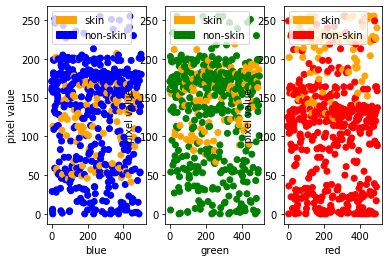

In [67]:
def plotter(c, index, plt):
    label_colors = []
    for value in Y[:500]:
        if value == 1:
           label_colors.append("orange")
        elif index == 0:
           label_colors.append("blue")
        elif index == 1:
           label_colors.append("green")
        else:
           label_colors.append("red")

    c.scatter(sp.arange(500), X[:500, index], c = label_colors )
    if index == 0:
        c.set_xlabel("blue")
        non_skin_patch = mpatches.Patch(color = "blue", label = "non-skin")
    elif index == 1:
        c.set_xlabel("green")
        non_skin_patch = mpatches.Patch(color = "green", label = "non-skin")
    else:
        c.set_xlabel("red")
        non_skin_patch = mpatches.Patch(color = "red", label = "non-skin")

    c.set_ylabel("pixel value")
    skin_patch = mpatches.Patch(color = "orange", label = "skin")
    plt.legend(handles = [skin_patch, non_skin_patch], loc = "upper left")

fig = plt.figure()
r = fig.add_subplot(131)
plotter(r, 0, plt)

g = fig.add_subplot(132)
plotter(g, 1, plt)

b = fig.add_subplot(133)
plotter(b, 2, plt)
plt.show()

### The above graph is formed by plotting random 500 samples out which we have come to following conclusions where Orange color represents that it is a skin color.

a) Anything below 40 and above 210 is a nonskin color.

b) Anything below 50 and above 230 is a nonskin color.

c) We can clearly say that anything below 100 in the red component is a nonskin color.

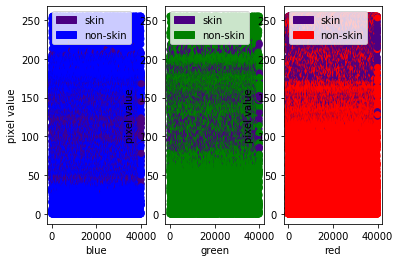

In [68]:
def plotter(c, index, plt):
    label_colors = []
    for value in Y[:40000]:
        if value == 1:
           label_colors.append("indigo")
        elif index == 0:
           label_colors.append("blue")
        elif index == 1:
           label_colors.append("green")
        else:
           label_colors.append("red")

    c.scatter(sp.arange(40000), X[:40000, index], c = label_colors )
    if index == 0:
        c.set_xlabel("blue")
        non_skin_patch = mpatches.Patch(color = "blue", label = "non-skin")
    elif index == 1:
        c.set_xlabel("green")
        non_skin_patch = mpatches.Patch(color = "green", label = "non-skin")
    else:
        c.set_xlabel("red")
        non_skin_patch = mpatches.Patch(color = "red", label = "non-skin")

    c.set_ylabel("pixel value")
    skin_patch = mpatches.Patch(color = "indigo", label = "skin")
    plt.legend(handles = [skin_patch, non_skin_patch], loc = "upper left")

fig = plt.figure()
r = fig.add_subplot(131)
plotter(r, 0, plt)

g = fig.add_subplot(132)
plotter(g, 1, plt)

b = fig.add_subplot(133)
plotter(b, 2, plt)
plt.show()

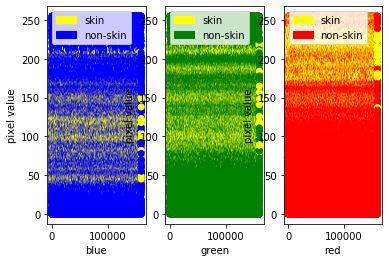

In [69]:
def plotter(c, index, plt):
    label_colors = []
    for value in Y[:160000]:
        if value == 1:
           label_colors.append("Yellow")
        elif index == 0:
           label_colors.append("blue")
        elif index == 1:
           label_colors.append("green")
        else:
           label_colors.append("red")

    c.scatter(sp.arange(160000), X[:160000, index], c = label_colors )
    if index == 0:
        c.set_xlabel("blue")
        non_skin_patch = mpatches.Patch(color = "blue", label = "non-skin")
    elif index == 1:
        c.set_xlabel("green")
        non_skin_patch = mpatches.Patch(color = "green", label = "non-skin")
    else:
        c.set_xlabel("red")
        non_skin_patch = mpatches.Patch(color = "red", label = "non-skin")

    c.set_ylabel("pixel value")
    skin_patch = mpatches.Patch(color = "Yellow", label = "skin")
    plt.legend(handles = [skin_patch, non_skin_patch], loc = "upper left")

fig = plt.figure()
r = fig.add_subplot(131)
plotter(r, 0, plt)

g = fig.add_subplot(132)
plotter(g, 1, plt)

b = fig.add_subplot(133)
plotter(b, 2, plt)
plt.show()

### The above two scatters graph are formed by plotting 40000 and 160000 random samples out of which we can conclude this is one of models which can be used to determine if its skin or nonskin. But from our visualization we can say that single approach is not possible because our threshold value actually forms a line which is parallel to either of the axes and no horizontal or vertical line can separate the two classes.

In [76]:
skin_data = data[data[:,3] == 1]

print("Blue:")
print("min of skin colors: " + str(skin_data[ : , 0].min()))
print("max of skin colors: " + str(skin_data[ : , 0].max()))

print("---------------------------------------")
print("Green:")
print("min of skin colors: " + str(skin_data[ : , 1].min()))
print("max of skin colors: " + str(skin_data[ : , 1].max()))

print("---------------------------------------")
print("Red:")
print("min of skin colors: " + str(skin_data[ : , 2].min()))
print("max of skin colors: " + str(skin_data[ : , 2].max()))



Blue:
min of skin colors: 26.0
max of skin colors: 225.0
---------------------------------------
Green:
min of skin colors: 56.0
max of skin colors: 230.0
---------------------------------------
Red:
min of skin colors: 106.0
max of skin colors: 255.0


### The above values show the minimum and maximum values of skinned which are similar to the prediction from the scatter plot.